## Hypothesis
To predict the incentive level requested for raising thermostat settings for 2-3F 
    when being at home in summer.

### Filter: HomeSYN=1 (i.e., only use people who use A/C when being at home in summer)


In [30]:
options(digits=2);
# Read in the data
survey <- read.csv("DR_Survey2_Share_Complete.csv",header=T);
#populate missing values
survey$IncHomeS[survey$IncHomeS==99] = NA;

data <- survey[,-c(1:7)];

#We investigate only use people who use A/C when being at home in summer
data1 <- data[data$HomeSYN==1,-which(names(data) %in% c("HomeWYN","AwayWNY","HomeSYN","AwaySNY","City","Utility",
    "ReasonPos","ReasonNeg","NBillS","NBillW","valid1","valid2","valid","Attitude","Trust",
    "EnergyC","MCG", "MCBill","Frugal","ComfortS","ComfortW","SubN","PBC","ACYN","HeatYN","Latitude",
    "Longitude", "Job","hot","cold"))];
sort(names(survey))
table(survey$Job)

[1] "ACYN"        "Age"         "Atti1"       "Atti2"       "Atti3"      
  [6] "Atti4"       "Attitude"    "AwayS"       "AwaySNY"     "AwayW"      
 [11] "AwayWNY"     "BillS"       "BillW"       "City"        "ComfNS1"    
 [16] "ComfNS2"     "ComfNS3"     "ComfNW1"     "ComfNW2"     "ComfortS"   
 [21] "ComfortW"    "CompR"       "ControlN1"   "ControlN2R"  "ControlN3"  
 [26] "ControlN4"   "ConvB1"      "ConvB2"      "ConvB3"      "ConvB4"     
 [31] "DeviceType"  "Educ"        "EmerRForm"   "EnergyC"     "EnergyC1"   
 [36] "EnergyC2"    "EnergyC3"    "EnergyC4"    "Ethnic"      "Frugal"     
 [41] "Frugal1"     "Frugal2"     "Frugal3"     "Gender"      "HTdevice"   
 [46] "HTsource"    "HabitC1"     "HabitC2"     "HabitC3"     "HabitC4"    
 [51] "HabitC5"     "HabitC6"     "HabitC7"     "HabitE1"     "HabitE2"    
 [56] "HabitE3"     "HeatYN"      "HomeS"       "HomeSYN"     "HomeW"      
 [61] "HomeWYN"     "HouseholdS"  "ID"          "INT1"        "INT2"       
 [66] "INT3"        "INT4"        "IncAutoS"    "IncAutoW"    "IncAwayS"   
 [71] "IncAwayW"    "IncDish"     "IncEmer10S"  "IncEmer10W"  "IncEmer30S" 
 [76] "IncEmer30W"  "IncHomeS"    "IncHomeW"    "IncWD"       "Income"     
 [81] "Job"         "Latitude"    "Longitude"   "MC1"         "MC2"        
 [86] "MC3"         "MC4"         "MC5"         "MCBill"      "MCG"        
 [91] "NBillS"      "NBillW"      "OwnRent"     "PBC"         "PBC1"       
 [96] "PBC2"        "PBC3R"       "PBC4"        "PBC5"        "PBillStatus"
[101] "Political"   "ReasonNeg"   "ReasonPos"   "RewardForm"  "SN1"        
[106] "SN2"         "SN3"         "SN4"         "Sqft"        "SqftCate"   
[111] "State"       "SubN"        "SubNorm1"    "SubNorm2"    "SubNorm3"   
[116] "Trust"       "Trust1"      "Trust2"      "Trust3"      "Trust4"     
[121] "Utility"     "X.9to5"      "cold"        "hot"         "valid"      
[126] "valid1"      "valid2"


  1   2   3   4   5   6   7   8   9  10  11  12 
 99  79  33  33  25  64  86  71  43 112  22 156 

In [31]:
#Frugal-Mean(Frugal1,Frugal2,Frugal3)
tmp <- cbind(Frugal1=data1$Frugal1,Frugal2=data1$Frugal2,Frugal3=data1$Frugal3)
print(dim(tmp))
data1$Frugal <- rowMeans(tmp)
data1 <- data1[,-which(names(data1) %in% c("Frugal1","Frugal2","Frugal3"))]
#print(data1)

[1] 662   3


In [32]:
#MC-Mean(MC3,MC4,MC5)
tmp <- cbind(MC3=data1$MC3,MC4=data1$MC4,MC5=data1$MC5)
print(dim(tmp))
data1$MC <- rowMeans(tmp)
data1 <- data1[,-which(names(data1) %in% c("MC3","MC4","MC5"))]
#print(data1)

[1] 662   3


In [33]:
#EnergyC-Mean(EnergyC1,EnergyC2,EnergyC4)
tmp <- cbind(EnergyC1=data1$EnergyC1,EnergyC2=data1$EnergyC2,EnergyC4=data1$EnergyC4)
print(dim(tmp))
data1$EnergyC <- rowMeans(tmp)
data1 <- data1[,-which(names(data1) %in% c("EnergyC1","EnergyC2","EnergyC4"))]
#print(data1)

[1] 662   3


In [34]:
#Trust-Mean(Trust1,Trust2,Trust3,Trust4)
tmp <- cbind(Trust1=data1$Trust1,Trust2=data1$Trust2,Trust3=data1$Trust3,Trust4=data1$Trust4)
print(dim(tmp))
data1$Trust <- rowMeans(tmp)
data1 <- data1[,-which(names(data1) %in% c("Trust1","Trust2","Trust3","Trust4"))]
#print(data1)

[1] 662   4


In [35]:
#ComfNS-Mean(ComfNS1,ComfNS2,ComfNS3)
tmp <- cbind(ComfNS1=data1$ComfNS1,ComfNS2=data1$ComfNS2,ComfNS3=data1$ComfNS3)
print(dim(tmp))
data1$ComfNS <- rowMeans(tmp)
data1 <- data1[,-which(names(data1) %in% c("ComfNS1","ComfNS2","ComfNS3"))]
#print(data1)

[1] 662   3


In [36]:
#Attitude-Mean(Atti1,Atti2,Atti3,Atti4)
tmp <- cbind(Atti1=data1$Atti1,Atti2=data1$Atti2,Atti3=data1$Atti3,Atti4=data1$Atti4)
print(dim(tmp))
data1$Atti <- rowMeans(tmp)
data1 <- data1[,-which(names(data1) %in% c("Atti1","Atti2","Atti3","Atti4"))]
#print(data1)

[1] 662   4


In [37]:
#SubNorm-Mean(SubNorm1,SubNorm2,SubNorm3)
tmp <- cbind(SubNorm1=data1$SubNorm1,SubNorm=data1$SubNorm2,SubNorm3=data1$SubNorm3)
print(dim(tmp))
data1$SubNorm <- rowMeans(tmp)
data1 <- data1[,-which(names(data1) %in% c("SubNorm1","SubNorm2","SubNorm3"))]
#print(data1)

[1] 662   3


In [38]:
#PBC-Mean(PBC1,PBC2,PBC4,PBC5)
tmp <- cbind(PBC1=data1$PBC1,PBC2=data1$PBC2,PBC4=data1$PBC4,PBC5=data1$PBC5)
print(dim(tmp))
data1$PBC <- rowMeans(tmp)
data1 <- data1[,-which(names(data1) %in% c("PBC1","PBC2","PBC4","PBC5"))]
#print(data1)

[1] 662   4


In [39]:
#SN-Mean(SN1,SN2,SN4)
tmp <- cbind(SN1=data1$SN1,SN=data1$SN2,SN4=data1$SN4)
print(dim(tmp))
data1$SN <- rowMeans(tmp)
data1 <- data1[,-which(names(data1) %in% c("SN1","SN2","SN4"))]
#print(data1)

[1] 662   3


In [40]:
#HabitG-Mean(HabitC1,HabitC2,HabitC3,HabitC4)
tmp <- cbind(HabitC1=data1$HabitC1,HabitC2=data1$HabitC2,HabitC3=data1$HabitC3,HabitC4=data1$HabitC4)
print(dim(tmp))
data1$HabitG <- rowMeans(tmp)
data1 <- data1[,-which(names(data1) %in% c("HabitC1","HabitC2","HabitC4","HabitC5"))]
#print(data1)

[1] 662   4


In [41]:
#HabitHC-Mean(HabitC5,HabitC6,HabitC7)
tmp <- cbind(HabitC5=data1$HabitC5,HabitC6=data1$HabitC6,HabitC7=data1$HabitC7)
print(dim(tmp))
data1$HabitC <- rowMeans(tmp)
data1 <- data1[,-which(names(data1) %in% c("HabitC5","HabitC6","HabitC7"))]
#print(data1)

[1] 662   2


In [42]:
#Fields with lots of missing values
for (n in names(data1)){
    nmis = sum(is.na(data1[,n]))
    if(nmis >1)  print (c(n, sum(is.na(data1[,n]))))
}

[1] "HomeW" "28"   
[1] "AwayW" "87"   
[1] "AwayS" "101"  
[1] "IncHomeS" "8"       
[1] "IncWD" "56"   
[1] "IncDish" "183"    
[1] "Age" "4"  
[1] "Income" "3"     
[1] "Educ" "5"   


In [43]:
#lets remover these
data2 <- data1[,-which(names(data1) %in% c("HomeW","AwayW",
                    "AwayS","IncWD","IncDish"))];
print(dim(data2))
data2 <- na.omit(data2)
print(dim(data2))

[1] 662  60
[1] 644  60


In [44]:
#Political (Categorical- recode 5,6,7 as “1”-republican, 
                        #recode 4,8 as “2”- apolitical, 
                        #recode 1,2,3 as “3”- democrat)
data2$Political[data2$Political==4]<-2 #apolitical
data2$Political[data2$Political==8]<-2 #apolitical
data2$Political[data2$Political==5]<-1 #republican
data2$Political[data2$Political==6]<-1 #republican
data2$Political[data2$Political==7]<-1 #republican
data2$Political[data2$Political==1]<-3 #democrat
data2$Political[data2$Political==2]<-3 #democrat
data2$Political[data2$Political==3]<-3 #democrat

In [45]:
#data2$Ethnic
#Ethnic (Categorical- keep 1 as “1”- white; group and recode all others as “0”- non white)
data2$Ethnic[data2$Ethnic==1]<-1 #white
data2$Ethnic[data2$Ethnic==2]<-0 #non-white
data2$Ethnic[data2$Ethnic==3]<-0
data2$Ethnic[data2$Ethnic==4]<-0
data2$Ethnic[data2$Ethnic==5]<-0
data2$Ethnic[data2$Ethnic==6]<-0
#data2$Ethnic

In [46]:
#names(data2)
#These are only variables we really care about
IVS = c("Age",
"Gender",
"OwnRent",
"SqftCate",
"HouseholdS",
"Political",
"Ethnic",
"Income",
"Educ",
"Frugal",
"MC",
"EnergyC",
"Trust",
"ComfNS",
"Atti",
"SubNorm",
"PBC",
"SN",
"HabitG",
"HabitC")

In [47]:
sort(names(data2))
paste(sort(IVS))

[1] "Age"        "Atti"       "BillS"      "BillW"      "ComfNS"    
 [6] "ComfNW1"    "ComfNW2"    "ControlN1"  "ControlN2R" "ControlN3" 
[11] "ControlN4"  "ConvB1"     "ConvB2"     "ConvB3"     "ConvB4"    
[16] "Educ"       "EmerRForm"  "EnergyC"    "EnergyC3"   "Ethnic"    
[21] "Frugal"     "Gender"     "HabitC"     "HabitC3"    "HabitE1"   
[26] "HabitE2"    "HabitE3"    "HabitG"     "HomeS"      "HouseholdS"
[31] "INT1"       "INT2"       "INT3"       "INT4"       "IncAutoS"  
[36] "IncAutoW"   "IncAwayS"   "IncAwayW"   "IncEmer10S" "IncEmer10W"
[41] "IncEmer30S" "IncEmer30W" "IncHomeS"   "IncHomeW"   "Income"    
[46] "MC"         "MC1"        "MC2"        "OwnRent"    "PBC"       
[51] "PBC3R"      "Political"  "RewardForm" "SN"         "SN3"       
[56] "Sqft"       "SqftCate"   "State"      "SubNorm"    "Trust"

[1] "Age"        "Atti"       "ComfNS"     "Educ"       "EnergyC"   
 [6] "Ethnic"     "Frugal"     "Gender"     "HabitC"     "HabitG"    
[11] "HouseholdS" "Income"     "MC"         "OwnRent"    "PBC"       
[16] "Political"  "SN"         "SqftCate"   "SubNorm"    "Trust"

In [48]:
data1 <- data2[, which(names(data2) %in% c("IncHomeS",IVS))];

In [49]:
#Check to see if there are anymore missing values
for (n in names(data1)){
    nmis = sum(is.na(data1[,n]))
    if(nmis >1)  print (c(n, sum(is.na(data1[,n]))))
}

In [50]:
names(data1)

#Fields with lots of missing values
for (n in names(data1)){
    nmis = sum(is.na(data1[,n]))
    if(nmis >1)  print (c(n, sum(is.na(data1[,n]))))
}
    
    
# What about high correlations?
hiCor <- function(x, level){
  res <- cor(x,method="spearman");
  res1 <- res; res1[res<0] <- -res[res < 0];
  for (i in 1:dim(x)[2]){
    res1[i,i] <- 0;
  }
  sel <- apply(res1,1,max,na.rm=T) > level;
  res[sel,sel];
}
#hiCor(data2,.75)

[1] "IncHomeS"   "Age"        "Gender"     "OwnRent"    "SqftCate"  
 [6] "HouseholdS" "Political"  "Ethnic"     "Income"     "Educ"      
[11] "Frugal"     "MC"         "EnergyC"    "Trust"      "ComfNS"    
[16] "Atti"       "SubNorm"    "PBC"        "SN"         "HabitG"    
[21] "HabitC"

In [51]:
data1 [is.na(data1$IncHomeS), ]

Warning message in cbind(f_parts$left, ellip_h, f_parts$right, deparse.level = 0L):
"number of rows of result is not a multiple of vector length (arg 2)"Warning message in cbind(f_parts$left, ellip_h, f_parts$right, deparse.level = 0L):
"number of rows of result is not a multiple of vector length (arg 2)"Warning message in cbind(f_parts$left, ellip_h, f_parts$right, deparse.level = 0L):
"number of rows of result is not a multiple of vector length (arg 2)"

IncHomeS,Age,Gender,OwnRent,SqftCate,HouseholdS,Political,Ethnic,Income,Educ,...,MC,EnergyC,Trust,ComfNS,Atti,SubNorm,PBC,SN,HabitG,HabitC


In [52]:
summary(data1$IncHomeS)
table(data1$IncHomeS)
table(data1$HouseholdS)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
    1.0     3.0     4.0     4.2     5.0     8.0 


  1   2   3   4   5   6   7   8 
 54  43 124 218  56  63  50  36 


  1   2   3   4   5 
 67 225 148 118  86 

In [55]:
data2 <- data1;
data2 <- na.omit(data2)
#data2

In [57]:
hiCor(data2,.75)

Warning message in cor(x, method = "spearman"):
"the standard deviation is zero"

ERROR: Error in res1[res < 0] <- -res[res < 0]: NAs are not allowed in subscripted assignments


In [8]:
res<-prcomp(data2, retx=F,scale=T)$rotation[,1:40];
resAbs <- res;
resAbs[res<0] <- -res[res<0];
z <- cumsum(prcomp(data2, retx=F,scale=T)$sdev^2)/
     sum(prcomp(data2, retx=F,scale=T)$sdev^2)

for (i in 1:40){
  print(z[i]);
  print(t(res[resAbs[,i]>.2,i,drop=FALSE]));
}


[1] 0.13
     MC3  MC5 Frugal1 Frugal3 ConvB1 Atti1 Atti2 Atti3 Atti4
PC1 -0.2 -0.2   -0.21   -0.21    0.2 -0.25 -0.24 -0.23 -0.24
[1] 0.2
    OwnRent NBillS  Sqft SqftCate Income Trust1 Trust3 Trust4   SN1   SN2   SN4
PC2   -0.22  -0.21 -0.23    -0.27  -0.22  -0.23  -0.22  -0.22 -0.24 -0.24 -0.21
[1] 0.26
    BillS NBillS SqftCate Trust1 Trust3 Trust4 ComfNS1 ComfNS2 ComfNS3
PC3  0.27    0.3     0.22  -0.24  -0.25  -0.23    0.24    0.23    0.22
[1] 0.31
    Trust1 Trust2 Trust3 Trust4 ComfNS1 ComfNS2 ComfNS3  PBC5
PC4  -0.26  -0.27  -0.23  -0.26   -0.27   -0.24   -0.29 -0.22
[1] 0.35
    OwnRent   MC1   MC2 ComfNS1 ComfNS2 ComfNS3  SN1  SN2  SN3  SN4
PC5    -0.2 -0.28 -0.26    0.26    0.22    0.26 0.26 0.26 0.21 0.26
[1] 0.39
      MC2 Frugal2 ConvB2 ConvB3 ConvB4 ControlN4
PC6 -0.23   -0.23  -0.25  -0.34  -0.35     -0.21
[1] 0.43
    Trust1 Trust2 Trust3 Trust4 Atti3   SN1   SN2   SN4
PC7   0.23   0.24   0.22   0.24  0.22 -0.23 -0.23 -0.21
[1] 0.46
    PBC1 PBC2 PBC4 PBC5 HabitC1 Hab

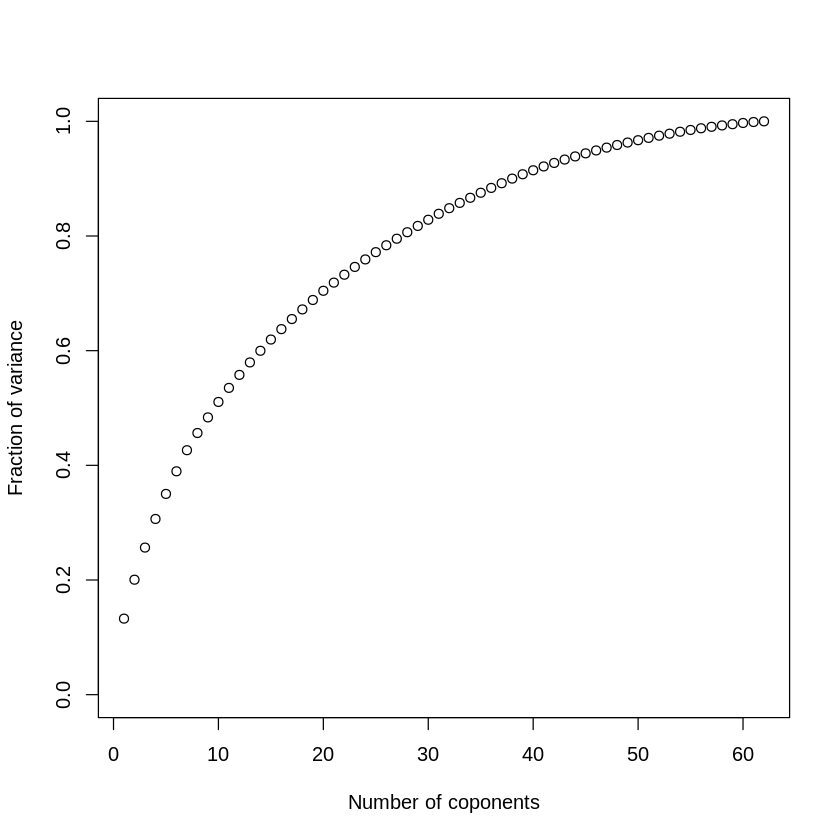

In [9]:
plot(1:dim(data2)[2],cumsum(prcomp(data2, retx=F,scale=T)$sdev^2)/
     sum(prcomp(data2, retx=F,scale=T)$sdev^2),
     ylim=c(0,1),xlab="Number of coponents",
     ylab="Fraction of variance");

In [10]:
res <- c();
vnam <- names(data2);
for (i in 2:dim(data2)[2]){
  fmla <- as.formula(paste(vnam[i],paste(vnam[-c(1,i)],collapse="+"),sep="~"));
  res <- rbind(res,c(i,round(summary(lm(fmla,data=data2))$r.squared,2)));
}

In [11]:
row.names(res) <- vnam[res[,1]];
o = order(-res[,2]);
res[o,][res[o,2]<.7,]

ComfNS3,28,0.68
MC1,14,0.67
MC2,15,0.67
ComfNS1,26,0.66
Trust2,23,0.64
SN4,52,0.64
Sqft,7,0.62
Frugal2,20,0.62
SubNorm2,42,0.60
Frugal3,21,0.59
ComfNS2,27,0.58


In [12]:
IndepPred <- row.names(res[o,][res[o,2]<.7,])

In [13]:
fmla <- as.formula(paste("IncHomeS",paste(IndepPred,collapse="+"),sep="~"));

In [14]:
table(data2[,"IncHomeS"])


  1   2   3   4   5   6   7   8 
 54  43 124 218  56  63  50  36 

In [15]:
mod = lm(fmla,data=data2)
summary(mod)


Call:
lm(formula = fmla, data = data2)

Residuals:
   Min     1Q Median     3Q    Max 
-3.892 -1.117 -0.107  1.098  4.836 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  2.74e+00   1.23e+00    2.23  0.02638 *  
ComfNS3      1.46e-01   6.80e-02    2.15  0.03185 *  
MC1          1.31e-02   7.04e-02    0.19  0.85301    
MC2          2.46e-02   7.50e-02    0.33  0.74277    
ComfNS1      7.65e-02   7.56e-02    1.01  0.31170    
Trust2      -3.95e-03   5.07e-02   -0.08  0.93787    
SN4          4.93e-02   5.14e-02    0.96  0.33735    
Sqft        -2.53e-05   7.93e-05   -0.32  0.74949    
Frugal2     -1.02e-01   9.00e-02   -1.14  0.25618    
SubNorm2    -1.47e-02   6.75e-02   -0.22  0.82736    
Frugal3     -1.78e-02   9.19e-02   -0.19  0.84678    
ComfNS2      9.37e-02   6.07e-02    1.54  0.12290    
Frugal1     -5.56e-02   1.09e-01   -0.51  0.61042    
MC5         -7.65e-02   8.71e-02   -0.88  0.38040    
ConvB4      -7.90e-03   5.71e-02   -0.14  0.89001  

In [16]:
anova(mod)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
ComfNS3,1,1.7e+02,166.007,57.101,1.6e-13
MC1,1,1.7e-01,0.171,0.059,8.1e-01
MC2,1,4.7e-01,0.466,0.160,6.9e-01
ComfNS1,1,1.7e+01,16.989,5.844,1.6e-02
Trust2,1,1.5e-01,0.145,0.050,8.2e-01
SN4,1,7.1e-01,0.712,0.245,6.2e-01
Sqft,1,3.7e-01,0.373,0.128,7.2e-01
Frugal2,1,1.9e+01,18.922,6.508,1.1e-02
SubNorm2,1,1.5e+00,1.503,0.517,4.7e-01
Frugal3,1,1.0e+00,1.038,0.357,5.5e-01


In [17]:
mod = lm(IncHomeS~ComfNS3+Age,data=data2)
summary(mod)


Call:
lm(formula = IncHomeS ~ ComfNS3 + Age, data = data2)

Residuals:
   Min     1Q Median     3Q    Max 
-3.823 -1.055 -0.180  0.983  4.793 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  2.01932    0.28749    7.02  5.5e-12 ***
ComfNS3      0.28673    0.03961    7.24  1.3e-12 ***
Age          0.02096    0.00608    3.45    6e-04 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1.7 on 641 degrees of freedom
Multiple R-squared:  0.0959,	Adjusted R-squared:  0.093 
F-statistic:   34 on 2 and 641 DF,  p-value: 9.4e-15


In [18]:
#Probably overfitting
mod1 = lm(IncHomeS~ComfNS3+Age+HabitC2,data=data2)
summary(mod1)


Call:
lm(formula = IncHomeS ~ ComfNS3 + Age + HabitC2, data = data2)

Residuals:
   Min     1Q Median     3Q    Max 
-3.921 -1.098 -0.182  0.968  4.521 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  2.58498    0.36044    7.17  2.1e-12 ***
ComfNS3      0.27899    0.03955    7.05  4.5e-12 ***
Age          0.02126    0.00605    3.51  0.00047 ***
HabitC2     -0.09554    0.03700   -2.58  0.01004 *  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1.7 on 640 degrees of freedom
Multiple R-squared:  0.105,	Adjusted R-squared:  0.101 
F-statistic: 25.1 on 3 and 640 DF,  p-value: 2.38e-15


In [19]:
library(mgcv)


Loading required package: nlme
This is mgcv 1.8-14. For overview type 'help("mgcv-package")'.


In [20]:
mGam = gam(IncHomeS~I(ComfNS3<=3)+I(ComfNS3==7)+s(Age),data=data2)
summary(mGam)



Family: gaussian 
Link function: identity 

Formula:
IncHomeS ~ I(ComfNS3 <= 3) + I(ComfNS3 == 7) + s(Age)

Parametric coefficients:
                    Estimate Std. Error t value Pr(>|t|)    
(Intercept)           4.1826     0.0906   46.17  < 2e-16 ***
I(ComfNS3 <= 3)TRUE  -0.7694     0.1666   -4.62  4.7e-06 ***
I(ComfNS3 == 7)TRUE   0.7656     0.1738    4.40  1.2e-05 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Approximate significance of smooth terms:
       edf Ref.df    F p-value    
s(Age)   1      1 13.3 0.00029 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

R-sq.(adj) =  0.0975   Deviance explained = 10.2%
GCV = 2.9649  Scale est. = 2.9465    n = 644

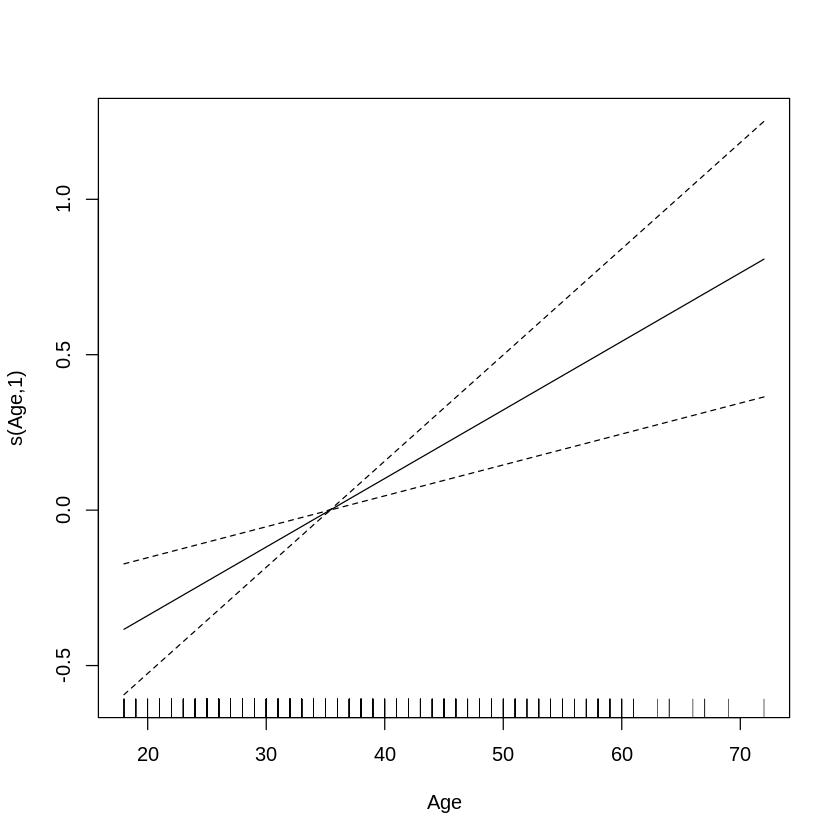

In [21]:
plot(mGam)

In [22]:
mod1 = lm(IncHomeS~I(ComfNS3<=3)+I(ComfNS3==7)+Age+HabitC2+ Political,data=data2)
summary(mod1)



Call:
lm(formula = IncHomeS ~ I(ComfNS3 <= 3) + I(ComfNS3 == 7) + Age + 
    HabitC2 + Political, data = data2)

Residuals:
   Min     1Q Median     3Q    Max 
-4.234 -1.162 -0.081  1.001  4.540 

Coefficients:
                    Estimate Std. Error t value Pr(>|t|)    
(Intercept)          4.19372    0.34065   12.31  < 2e-16 ***
I(ComfNS3 <= 3)TRUE -0.77483    0.16608   -4.67  3.8e-06 ***
I(ComfNS3 == 7)TRUE  0.75141    0.17314    4.34  1.7e-05 ***
Age                  0.02211    0.00602    3.67  0.00026 ***
HabitC2             -0.09516    0.03689   -2.58  0.01011 *  
Political           -0.05864    0.03039   -1.93  0.05408 .  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1.7 on 638 degrees of freedom
Multiple R-squared:  0.116,	Adjusted R-squared:  0.109 
F-statistic: 16.7 on 5 and 638 DF,  p-value: 1.68e-15


In [23]:
anova(mod1)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
I(ComfNS3 <= 3),1,115,115.2,39.6,5.8e-10
I(ComfNS3 == 7),1,59,59.2,20.3,7.7e-06
Age,1,39,39.1,13.4,2.7e-04
HabitC2,1,18,18.4,6.3,1.2e-02
Political,1,11,10.8,3.7,5.4e-02
Residuals,638,1857,2.9,NA,NA


In [24]:
drop1(mod1)

,Df,Sum of Sq,RSS,AIC
<none>,NA,NA,1857,694
I(ComfNS3 <= 3),1,63,1920,713
I(ComfNS3 == 7),1,55,1911,711
Age,1,39,1896,705
HabitC2,1,19,1876,699
Political,1,11,1867,696


In [25]:
library(bnlearn)


Attaching package: 'bnlearn'

The following object is masked from 'package:stats':

    sigma



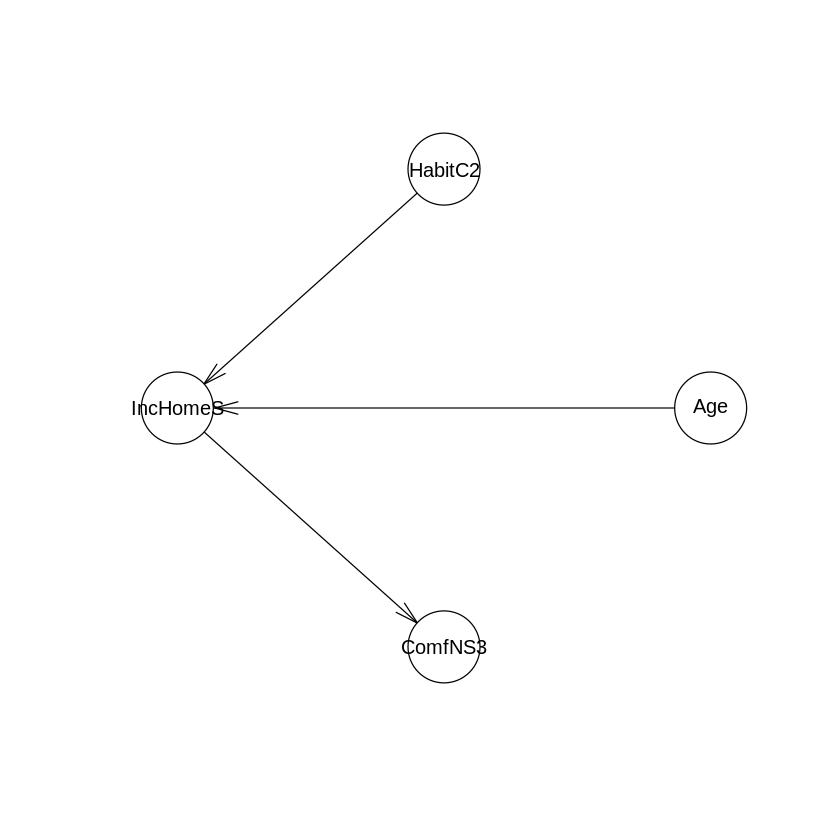

In [26]:
dd2 = data2[,c('IncHomeS', 'ComfNS3','Age','HabitC2')]
for (i in 1:4) dd2[,i] <- as.double(dd2[,i])
dag2 = tabu(dd2)
plot(dag2)

In [27]:
fmlaF <- as.formula(paste("IncHomeS",paste(IVS,collapse="+"),sep="~"));
mod = lm(fmlaF,data=data2)
summary(mod)


Call:
lm(formula = fmlaF, data = data2)

Residuals:
   Min     1Q Median     3Q    Max 
-3.672 -1.120 -0.092  1.051  4.878 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)   
(Intercept)  3.12e+00   1.26e+00    2.49   0.0132 * 
Age          2.37e-02   7.22e-03    3.28   0.0011 **
Gender       1.02e-01   1.56e-01    0.66   0.5117   
OwnRent     -1.93e-03   1.64e-01   -0.01   0.9906   
BillS        6.56e-04   1.27e-03    0.52   0.6060   
NBillS       1.30e-01   1.29e-01    1.01   0.3138   
Sqft        -3.13e-05   1.11e-04   -0.28   0.7776   
SqftCate    -3.01e-02   1.10e-01   -0.27   0.7853   
HouseholdS  -8.02e-02   6.84e-02   -1.17   0.2412   
Political   -6.80e-02   3.33e-02   -2.04   0.0417 * 
Ethnic       1.03e-01   6.05e-02    1.70   0.0901 . 
Income      -3.16e-02   4.24e-02   -0.74   0.4571   
Educ         2.87e-02   6.87e-02    0.42   0.6760   
MC1          2.52e-03   7.09e-02    0.04   0.9716   
MC2          3.68e-02   7.60e-02    0.48   0.6290   
MC3         

In [28]:
#Probably overfitting
mod1 = lm(IncHomeS~ComfNS3+Age+HabitC2+Political+Ethnic+Trust1,data=data2)
summary(mod1)


Call:
lm(formula = IncHomeS ~ ComfNS3 + Age + HabitC2 + Political + 
    Ethnic + Trust1, data = data2)

Residuals:
   Min     1Q Median     3Q    Max 
-4.518 -1.152 -0.131  1.015  4.526 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  2.53367    0.43662    5.80  1.0e-08 ***
ComfNS3      0.28415    0.03962    7.17  2.1e-12 ***
Age          0.02216    0.00608    3.65  0.00029 ***
HabitC2     -0.09861    0.03698   -2.67  0.00786 ** 
Political   -0.05255    0.03052   -1.72  0.08559 .  
Ethnic       0.09676    0.05622    1.72  0.08571 .  
Trust1       0.02235    0.04340    0.51  0.60675    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1.7 on 637 degrees of freedom
Multiple R-squared:  0.114,	Adjusted R-squared:  0.106 
F-statistic: 13.7 on 6 and 637 DF,  p-value: 1.1e-14


In [29]:
for (i in 1:length(IVS){
  fmla <- as.formula(paste(IVS[i],paste(vnam[-c(1,i)],collapse="+"),sep="~"));
  res <- rbind(res,c(i,round(summary(lm(fmla,data=data2))$r.squared,2)));
}
vnam <- (data2);
fmlaF <- as.formula(paste("Age",paste(IVS[-"Age"],collapse="+"),sep="~"));
mod = lm(fmlaF,data=data2)
summary(mod)

ERROR: Error in parse(text = x, srcfile = src): <text>:1:24: unexpected '{'
1: for (i in 1:length(IVS){
                           ^


In [ ]:
ind <- 1:length(IVS);names(ind) <- IVS

In [ ]:
fmlaF <- as.formula(paste("Age",paste(IVS[-ind["Age"]],collapse="+"),sep="~"));
mod = lm(fmlaF,data=data2)
res <- summary(mod)$coefficients
res[abs(res[,3])>3,]

In [ ]:
fmlaF <- as.formula(paste("ComfNS3",paste(IVS[-ind["ComfNS3"]],collapse="+"),sep="~"));
mod = lm(fmlaF,data=data2)
res <- summary(mod)$coefficients
res[abs(res[,3])>3,]

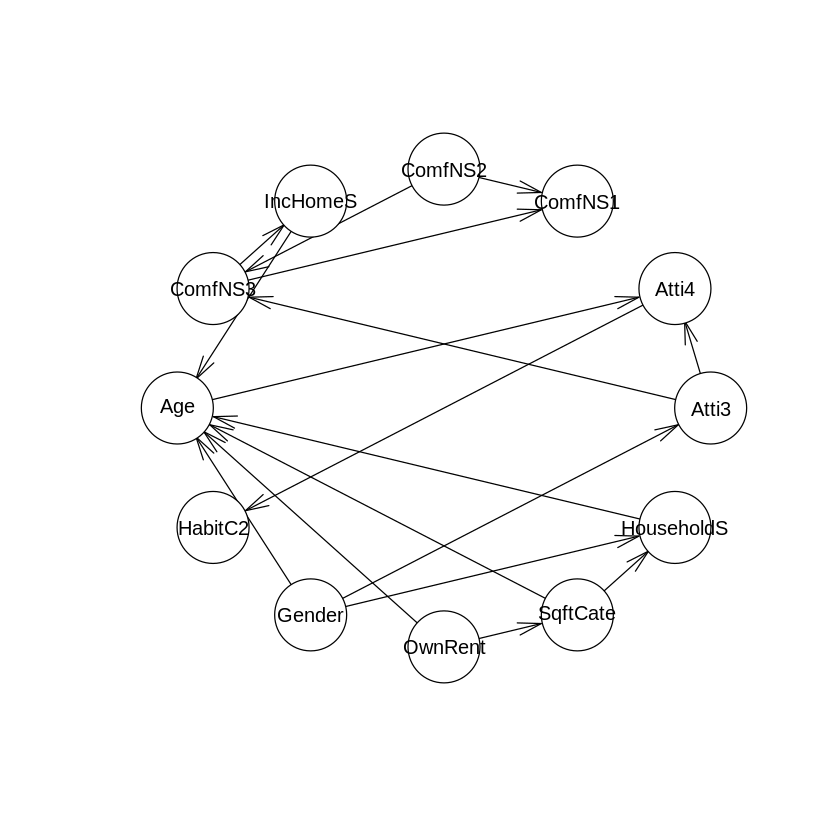

In [30]:
dd2 = data2[,c('IncHomeS', 'ComfNS3','Age','HabitC2',"Gender","OwnRent","SqftCate",
               "HouseholdS","Atti3","Atti4","ComfNS1","ComfNS2")]
for (i in 1:12) dd2[,i] <- as.double(dd2[,i])
dag2 = tabu(dd2)
plot(dag2)